In [1]:
from qiskit import *
from qiskit import QuantumCircuit, Aer
import sympy
import numpy as np
from scipy import linalg
from functools import reduce
import itertools

import utils.idx as idx
import decomp

In [2]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
r2 = 1/np.sqrt(2)
H = np.array([[r2, r2], [r2, -r2]])
i2 = np.array([[1, 0], [0, 1]])

In [3]:
nbits = 3
a = np.random.random((2**nbits,2**nbits)) + 1j*np.random.random((2**nbits,2**nbits))
u,_ = np.linalg.qr(a)
d = decomp.factor("QASMBench/small/dnn_n2/dnn_n2.qasm")

Number of ops: 3
Fidelity: 0.9999541762644178


In [4]:
sympy.Matrix(d[1])
for mat in d:
    print(len(extract_unitaries(mat)[1]))

Matrix([
[0.901863369781848,                 0, -0.432021367811512,                  0],
[                0, 0.704851690032635,                  0, -0.709354703274841],
[0.432021367811512,                 0,  0.901863369781848,                  0],
[                0, 0.709354703274841,                  0,  0.704851690032635]])

In [5]:
def extract_unitaries(mat):
    for tgt in range(nbits):
        # get list of controlled unitary gates
        ones = np.ones(mat.shape[0], complex)
        umats = []
        success = True
        for cbits in itertools.product([0,1], repeat=nbits-1):
            cbits = list(cbits)
            cbits_before = cbits[:tgt]
            cbit_after = cbits[tgt:]
            idx0 = idx.idx_from_bits(cbits_before + [0] + cbit_after)
            idx1 = idx.idx_from_bits(cbits_before + [1] + cbit_after)
            umat = np.diag(ones)
            umat[idx0,idx0] = mat[idx0,idx0]
            umat[idx0,idx1] = mat[idx0,idx1]
            umat[idx1,idx0] = mat[idx1,idx0]
            umat[idx1,idx1] = mat[idx1,idx1]
            # test if unitary
            if not np.all(np.isclose(np.dot(np.transpose(np.conjugate(umat)), umat), np.identity(umat.shape[0]))):
                success = False
                break
            if not np.all(np.isclose(umat, np.identity(umat.shape[0]), 1e-3, 1e-3)):
                umats.append(umat)
        if success:
            return tgt,umats

ngates = []
for nbits in range(2,7):
    a = np.random.random((2**nbits,2**nbits)) + 1j*np.random.random((2**nbits,2**nbits))
    u,_ = np.linalg.qr(a)
    d = decomp.factor(u)
    ngate = 0
    for mat in d:
        tgt,umats = extract_unitaries(mat)
        print(tgt, len(umats))
        ngate += len(umats)
    ngates.append(ngate)

Number of ops: 3
Fidelity: 1.0000000000000004
1 2
0 2
1 2
Number of ops: 7
Fidelity: 0.9999999999999998
2 4
1 4
2 4
0 4
2 4
1 4
2 4
Number of ops: 15
Fidelity: 1.0000000000000004
3 8
2 8
3 8
1 8
3 8
2 8
3 8
0 8
3 8
2 8
3 8
1 8
3 8
2 8
3 8
Number of ops: 31
Fidelity: 1.0
4 16
3 16
4 16
2 16
4 16
3 16
4 16
1 16
4 16
3 16
4 16
2 16
4 16
3 16
4 16
0 16
4 16
3 16
4 16
2 16
4 16
3 16
4 16
1 16
4 16
3 16
4 16
2 16
4 16
3 16
4 16
Number of ops: 63
Fidelity: 1.0
5 32
4 32
5 32
3 32
5 32
4 32
5 32
2 32
5 32
4 32
5 32
3 32
5 32
4 32
5 32
1 32
5 32
4 32
5 32
3 32
5 32
4 32
5 32
2 32
5 32
4 32
5 32
3 32
5 32
4 32
5 32
0 32
5 32
4 32
5 32
3 32
5 32
4 32
5 32
2 32
5 32
4 32
5 32
3 32
5 32
4 32
5 32
1 32
5 32
4 32
5 32
3 32
5 32
4 32
5 32
2 32
5 32
4 32
5 32
3 32
5 32
4 32
5 32


In [6]:
np.identity(2)

array([[1., 0.],
       [0., 1.]])

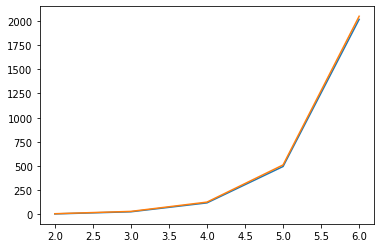

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(2,7), ngates)
plt.plot(range(2,7), [4**x/2 for x in range(2,7)])